<a href="https://colab.research.google.com/github/BoneZhou/Application-of-AI/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/wkentaro/pytorch-fcn.git

Cloning into 'pytorch-fcn'...
remote: Enumerating objects: 1705, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1705 (delta 21), reused 30 (delta 10), pack-reused 1650
Receiving objects: 100% (1705/1705), 32.75 MiB | 35.12 MiB/s, done.
Resolving deltas: 100% (979/979), done.


In [3]:
import torch
import torchvision.models.segmentation as segmentation_models

model = segmentation_models.deeplabv3_resnet101(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:00<00:00, 254MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [9]:
from PIL import Image
from torchvision import transforms

input_image = Image.open('/content/drive/MyDrive/Colab-Notebooks/segmentation.jpg')
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image).unsqueeze(0)

with torch.no_grad():
    output = model(input_tensor)
    print(output['out'].size())

torch.Size([1, 21, 256, 256])


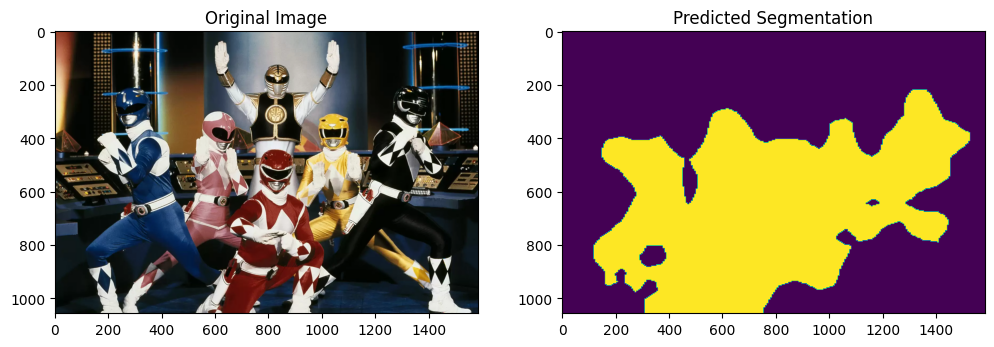

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 取出輸出
predictions = output['out'].squeeze().argmax(dim=0).detach().cpu().numpy()

# 將預測結果轉為PIL圖像
predicted_image = Image.fromarray(predictions.astype(np.uint8))

# 使用原始圖像的尺寸進行調整
predicted_image_resized = predicted_image.resize(input_image.size, Image.NEAREST)

# 顯示原始圖像
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')

# 顯示調整後的預測結果
plt.subplot(1, 2, 2)
plt.imshow(predicted_image_resized)
plt.title('Predicted Segmentation')
plt.show()